In [1]:
# Récupération des packages utiles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from functions import *

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [3]:
# Lecture de la base de données
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")
print(df)

C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                 code  \
0                3087   
1                4530   
2                4559   
3               16087   
4               16094   
...               ...   
320767  9948282780603   
320768       99567453   
320769  9970229501521   
320770  9980282863788   
320771   999990026839   

                                                                                                                                               url  \
0                                                       http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
1                                                             http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole   
2                                                                     http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser   
3                                                         http://world-fr.openfoodfacts.org/produit

In [4]:
df.shape

(320772, 162)

<AxesSubplot:>

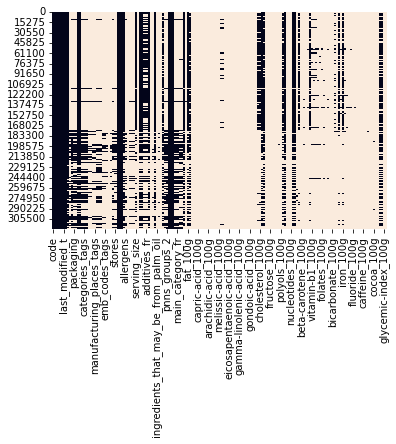

In [5]:
#HeatMap des valeurs manquantes dans le jeu de données
sns.heatmap(df.isnull(), cbar= False)

In [6]:
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

In [7]:
df.info(verbose = True, null_counts = True)

C:\Users\alexa\AppData\Local\Temp/ipykernel_3104/125353452.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

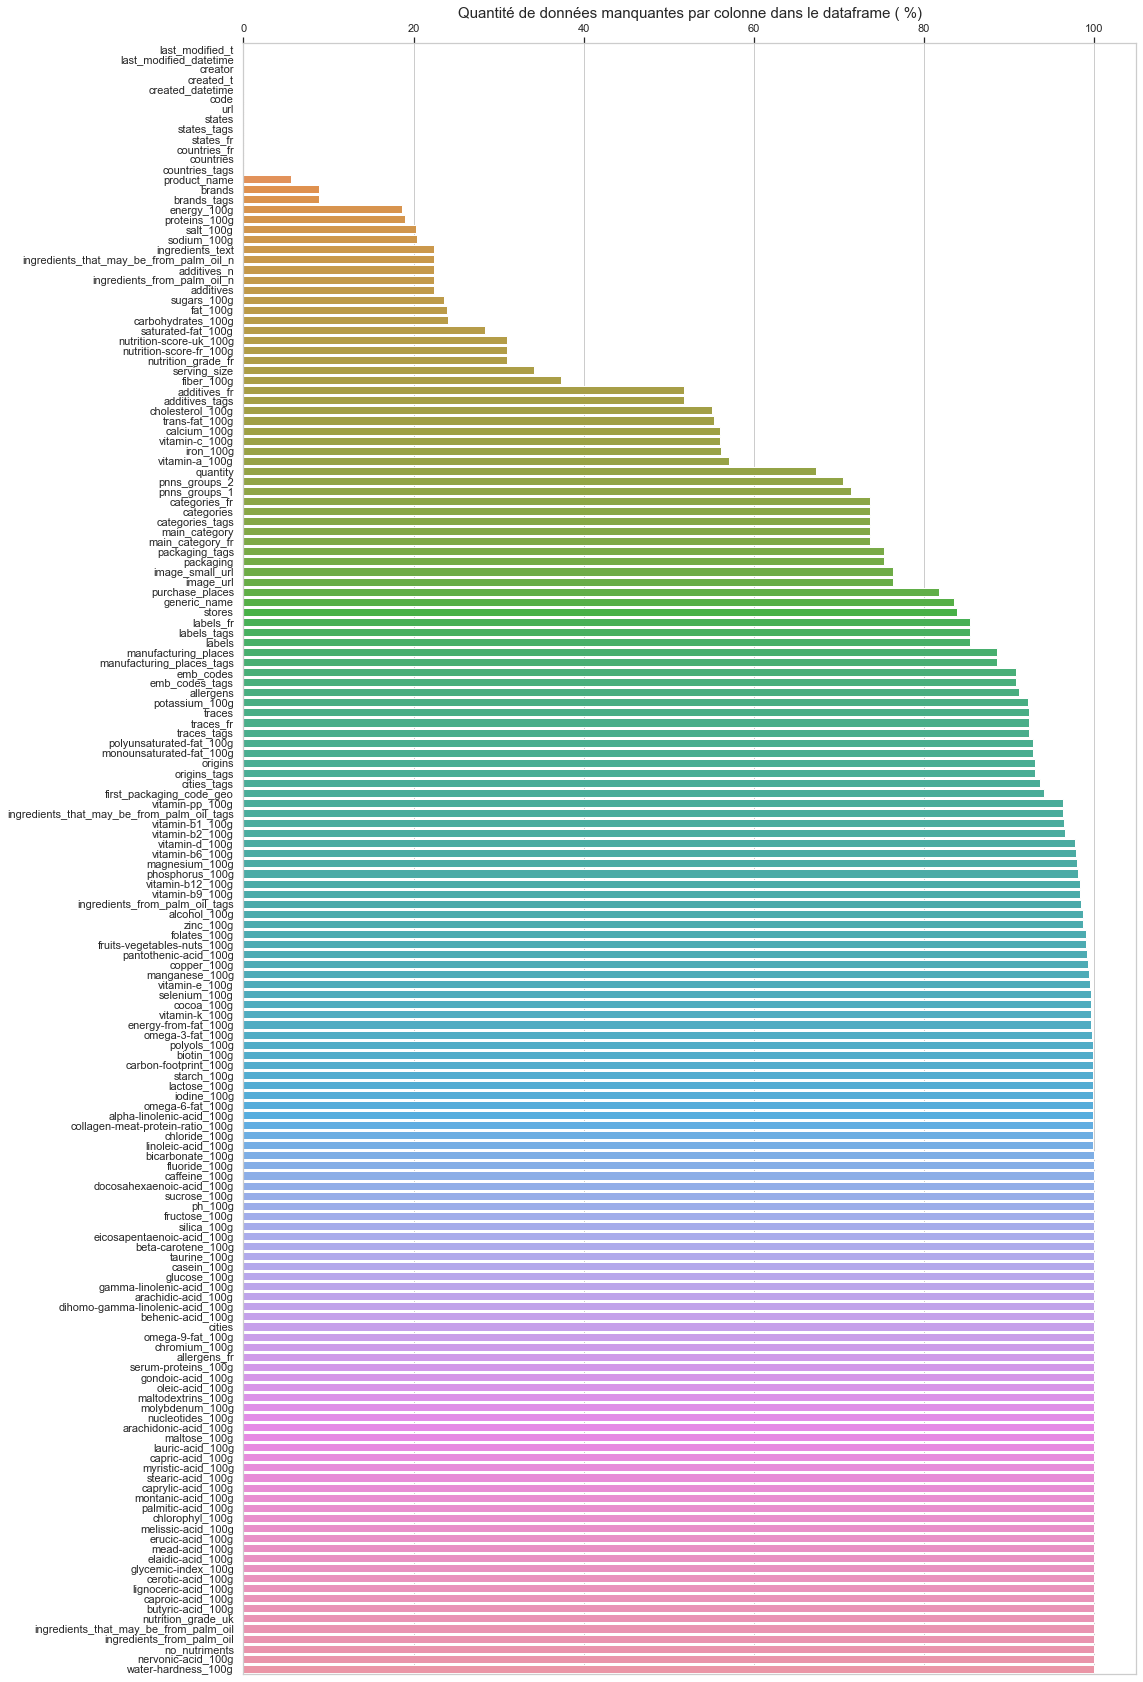

In [8]:
#Visualisation sous forme de diagramme baton des données manquantes par colonne
def proportion_missing_values(dataframe):
        miss = dataframe.isna().sum().divide(dataframe.shape[0]/100).sort_values(ascending=True)
        return miss

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_missing_values(df).index, x=proportion_missing_values(df).values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le dataframe ( %)', size=15)
plt.show()

## Choix des variables qui nous interessent

In [9]:
mod_df = df.filter(['code','countries_fr','energy_100g','proteins_100g','sodium_100g','sugars_100g',
                'fat_100g','carbohydrates_100g','saturated-fat_100g','fiber_100g','fruits-vegetables-nuts_100g'
                    ,'nutrition-score-fr_100g','pnns_groups_1','pnns_groups_2',
                'ingredients_that_may_be_from_palm_oil_n','additives_n','manufacturing_places_tags'])

In [10]:
mod_df.head()

,code,countries_fr,energy_100g,proteins_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,ingredients_that_may_be_from_palm_oil_n,additives_n,manufacturing_places_tags
0,3087,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,États-Unis,2243.0,3.57,0.000,14.29,28.57,64.29,28.57,3.6,NaN,14.0,NaN,NaN,0.0,0.0,NaN
2,4559,États-Unis,1941.0,17.86,0.250,17.86,17.86,60.71,0.00,7.1,NaN,0.0,NaN,NaN,0.0,0.0,NaN
3,16087,États-Unis,2540.0,17.86,0.482,3.57,57.14,17.86,5.36,7.1,NaN,12.0,NaN,NaN,0.0,0.0,NaN
4,16094,États-Unis,1552.0,8.57,NaN,NaN,1.43,77.14,NaN,5.7,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [11]:
mod_df.describe()

,energy_100g,proteins_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,ingredients_that_may_be_from_palm_oil_n,additives_n
count,2.611130e+05,259922.000000,255463.000000,244971.000000,243891.000000,243588.000000,229554.000000,200886.000000,3036.000000,221210.000000,248939.000000,248939.000000
mean,1.141915e+03,7.075940,0.798815,16.003484,12.730379,32.073981,5.129932,2.862111,31.458587,9.165535,0.055246,1.936024
std,6.447154e+03,8.409054,50.504428,22.327284,17.578747,29.731719,8.014238,12.867578,31.967918,9.055903,0.269207,2.502019
min,0.000000e+00,-800.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,-6.700000,0.000000,-15.000000,0.000000,0.000000
25%,3.770000e+02,0.700000,0.025000,1.300000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.100000e+03,4.760000,0.229000,5.710000,5.000000,20.600000,1.790000,1.500000,23.000000,10.000000,0.000000,1.000000
75%,1.674000e+03,10.000000,0.541000,24.000000,20.000000,58.330000,7.140000,3.600000,51.000000,16.000000,0.000000,3.000000
max,3.251373e+06,430.000000,25320.000000,3520.000000,714.290000,2916.670000,550.000000,5380.000000,100.000000,40.000000,6.000000,31.000000


### Traitement des données de type objet qui nous intéressent

In [12]:
mod_df["countries_fr"].value_counts()

États-Unis                                                                                                                                                                                                             172998
France                                                                                                                                                                                                                  94392
Suisse                                                                                                                                                                                                                  14953
Allemagne                                                                                                                                                                                                                7870
Espagne                                                                                                         

In [13]:
mod_df["pnns_groups_1"].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [14]:
mod_df["pnns_groups_2"].value_counts()

unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909
Vegetables                           2840
Fish and seafood                     2638
Sweetened beverages                  2170
Appetizers                           2101
Fruits                               2068
Fruit juices                         1924
Bread                                1838
Meat                                 1694
Fats                                 1614
Breakfast cereals                    1408
vegetables                            934
Legumes                           

In [15]:
#Normalisation de certaines données dont nous aurons besoin pour l'application
mod_df["countries_fr"] = mod_df["countries_fr"].str.lower().str.replace(',', ' ')
mod_df["pnns_groups_1"] = mod_df["pnns_groups_1"].str.lower().str.replace('-', ' ')
mod_df["pnns_groups_2"] = mod_df["pnns_groups_2"].str.lower()

# Gestion des doublons

In [16]:
# On regarde les doublons vis-à-vis de la variable 'code' que l'on doit détecter.

def detect_doublons(dataframe, subset):
    doublons = dataframe.duplicated(subset = subset, keep = False)
       
    if True in list(doublons.unique()):
            result = len(dataframe[doublons])
            print("Il y a {} doublons".format(result))
            return result

    else:
        print("Il n'y a pas de doublons")
        return 0

In [17]:
detect_doublons(mod_df, 'code')

Il y a 245 doublons


245

In [18]:
#Suppression des doublons par 'code', puis vérification
mod_df.drop_duplicates(['code'], inplace=True)
detect_doublons(mod_df, 'code')

Il n'y a pas de doublons


0

# Traitement des valeurs manquantes

In [19]:
# On impute tous les NaN de fruits-vegetables-nuts_100g par 0, pour punir les produits qui ne sont pas renseignés à ce 
#sujet

mod_df['fruits-vegetables-nuts_100g'] = mod_df['fruits-vegetables-nuts_100g'].fillna(0)

In [20]:
#Création d'une colonne Masse totale_100g, pour supprimer les lignes ou la valeur est supérieure à 100.
mod_df['Masse_Totale_100g'] = mod_df['fat_100g'] + mod_df['carbohydrates_100g'] + mod_df['fiber_100g'] + mod_df['proteins_100g']
+ mod_df['sodium_100g'] + mod_df['fruits-vegetables-nuts_100g']
mod_df.head()

,code,countries_fr,energy_100g,proteins_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,ingredients_that_may_be_from_palm_oil_n,additives_n,manufacturing_places_tags,Masse_Totale_100g
0,3087,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,états-unis,2243.0,3.57,0.000,14.29,28.57,64.29,28.57,3.6,0.0,14.0,NaN,NaN,0.0,0.0,NaN,100.03
2,4559,états-unis,1941.0,17.86,0.250,17.86,17.86,60.71,0.00,7.1,0.0,0.0,NaN,NaN,0.0,0.0,NaN,103.53
3,16087,états-unis,2540.0,17.86,0.482,3.57,57.14,17.86,5.36,7.1,0.0,12.0,NaN,NaN,0.0,0.0,NaN,99.96
4,16094,états-unis,1552.0,8.57,NaN,NaN,1.43,77.14,NaN,5.7,0.0,NaN,NaN,NaN,0.0,0.0,NaN,92.84


In [21]:
#Traitement des NaN pour les variables objet qui nous intéressent
mod_df['pnns_groups_1'].fillna('unknown', inplace = True)
mod_df['pnns_groups_2'].fillna('unknown', inplace = True)
mod_df['manufacturing_places_tags'].fillna('unknown', inplace = True)

In [22]:
mod_df['manufacturing_places_tags'].isna().sum()

0

In [23]:
mod_df['pnns_groups_1'].isna().sum()

0

In [24]:
mod_df['pnns_groups_2'].isna().sum()

0

In [25]:
mod_df.shape

(320639, 18)

### Gestion des outliers

In [26]:
# Fonction pour retirer les variables objets d'un dataframe pour boucler sur les variables quantitatives
def objet_sup(dataframe):
    dataframe_2 = dataframe.select_dtypes(exclude=["object", "category"])
    return dataframe_2
    

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


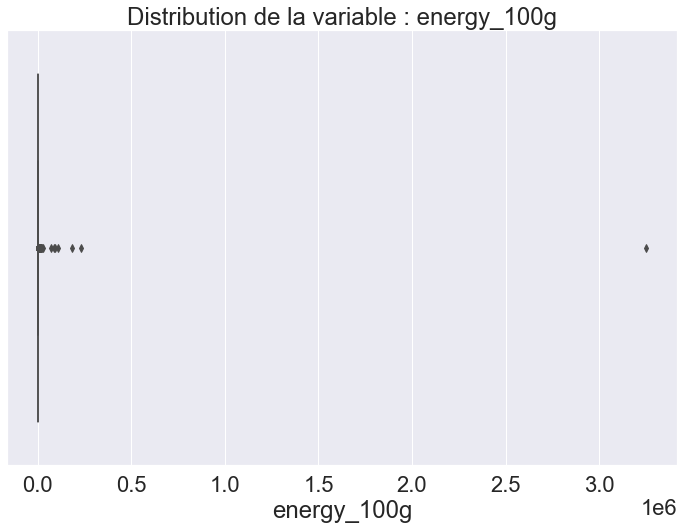

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


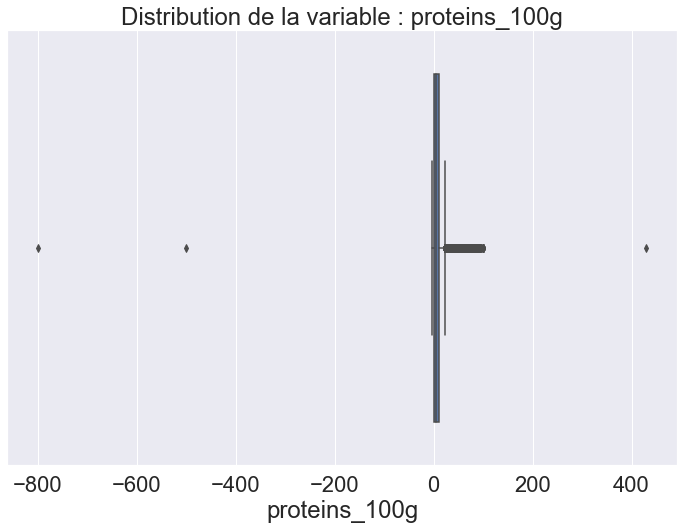

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


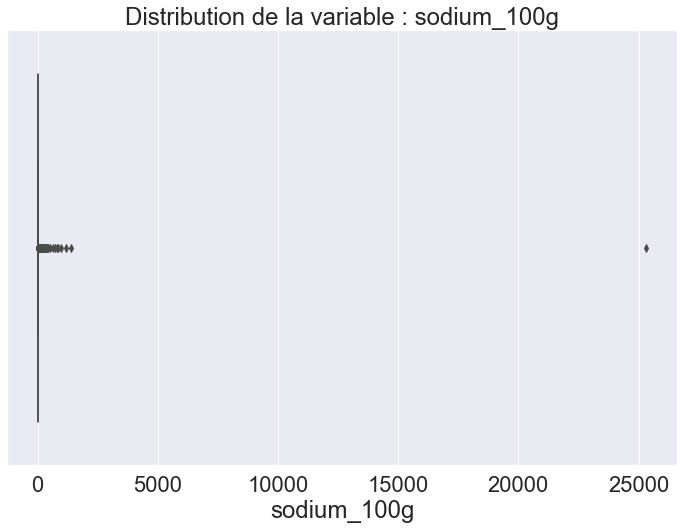

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


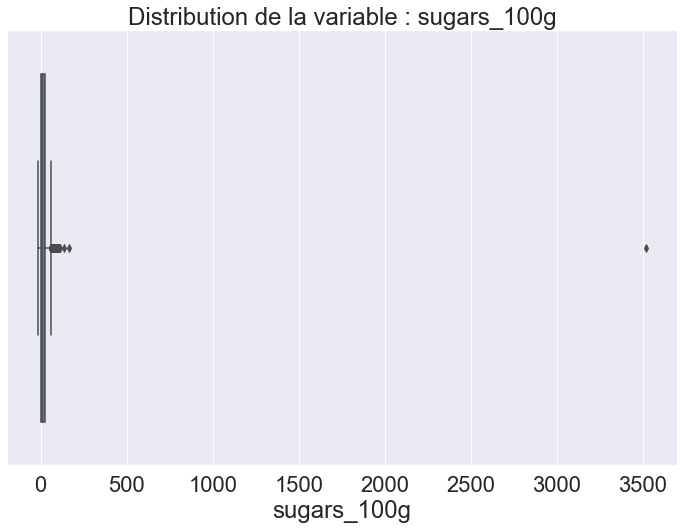

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


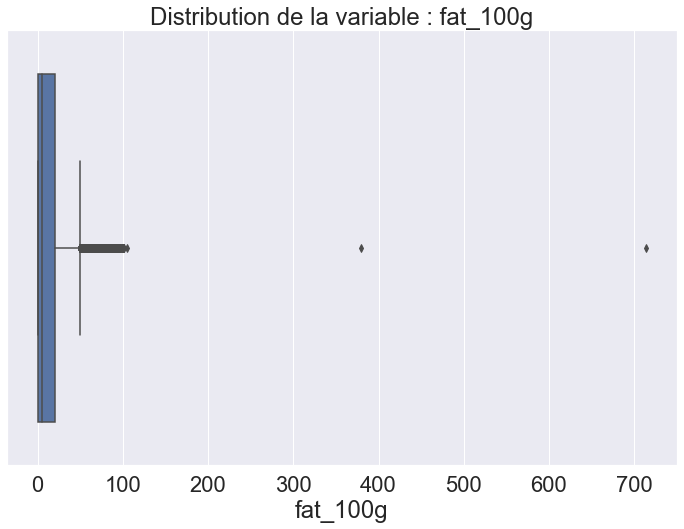

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


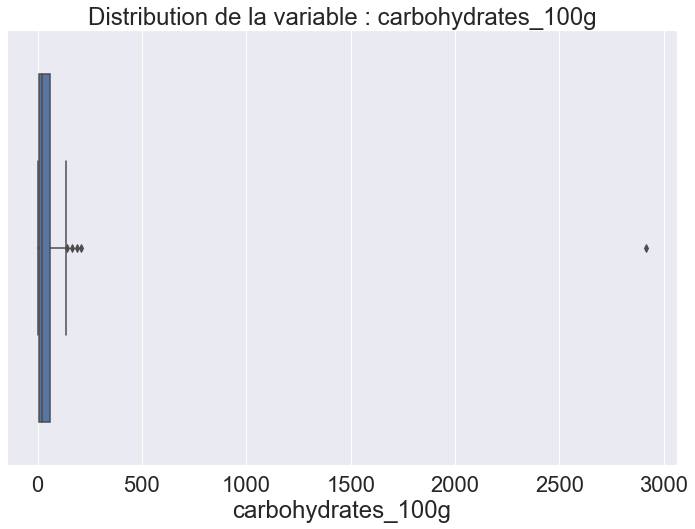

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


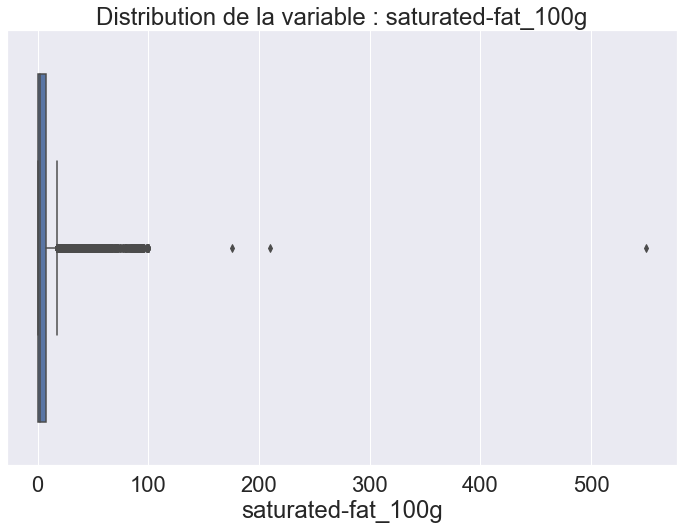

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


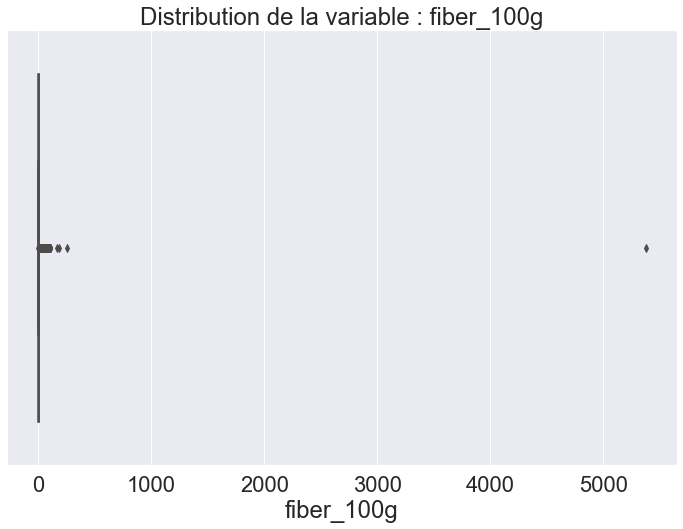

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


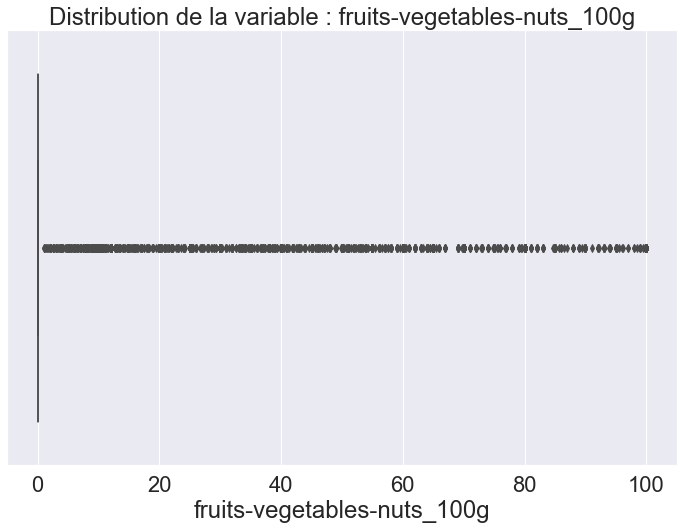

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


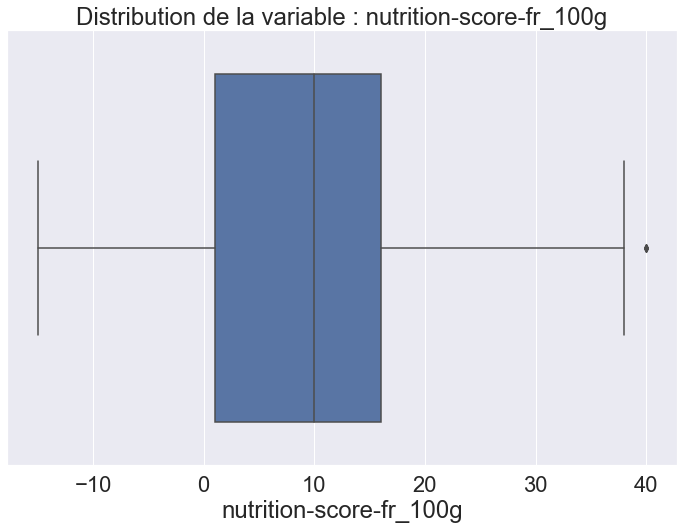

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


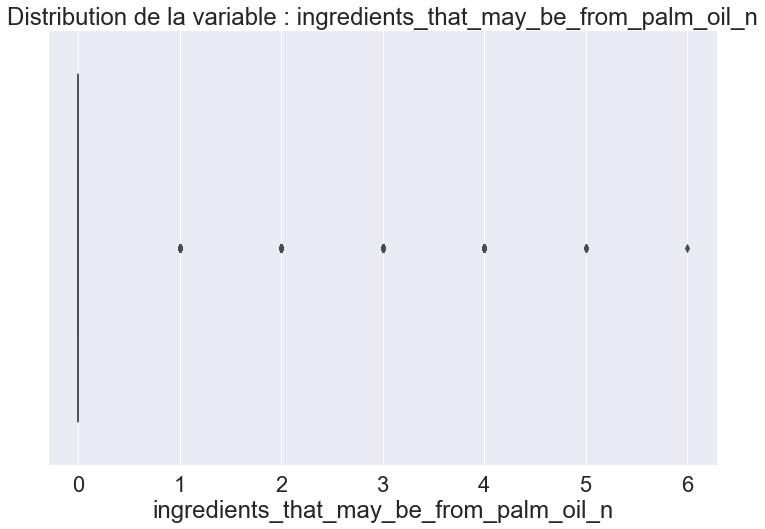

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


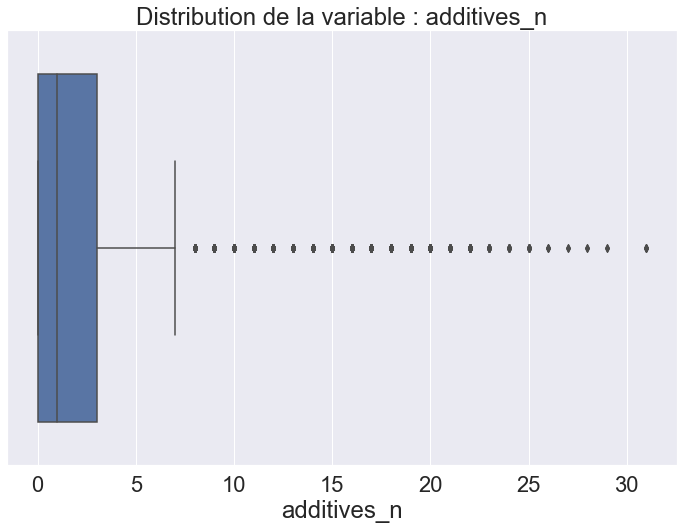

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


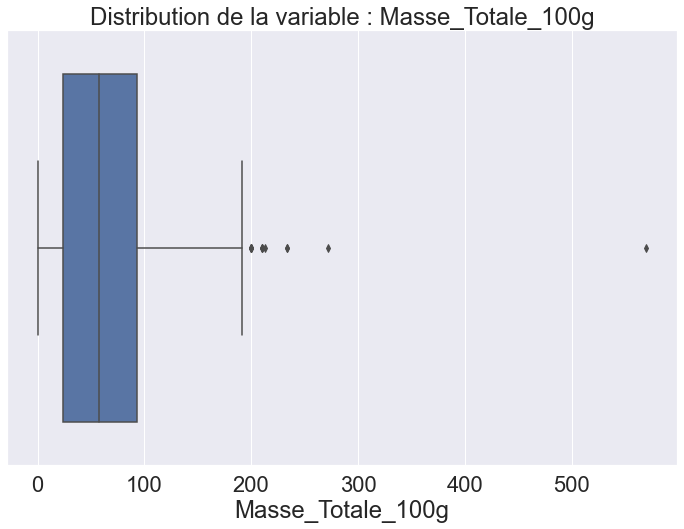

In [27]:
#Visualisation des outliers avant imputation par boites à moustaches sur les dataframes sans colonne de type object

sns.set(font_scale=2)
for column in objet_sup(mod_df):
    plt.figure(figsize = (12,8))
    
    sns.boxplot(mod_df[column])
    
    plt.title('Distribution de la variable : ' + column)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)


C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


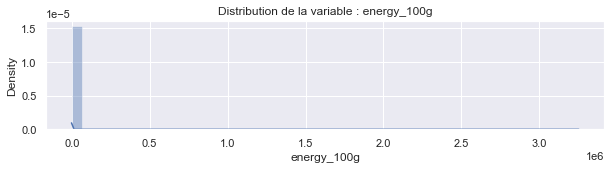

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


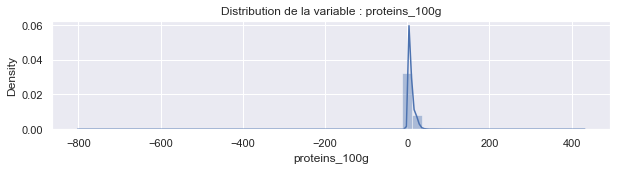

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


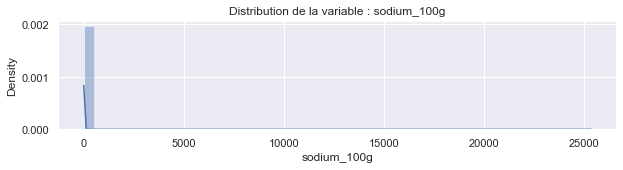

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


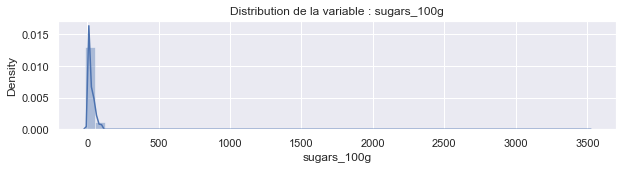

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


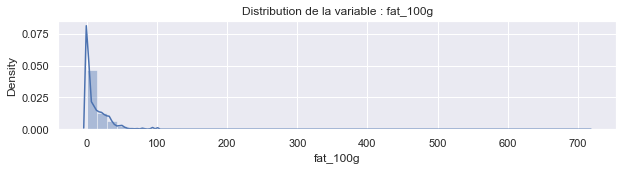

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


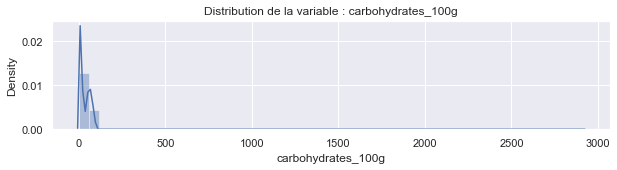

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


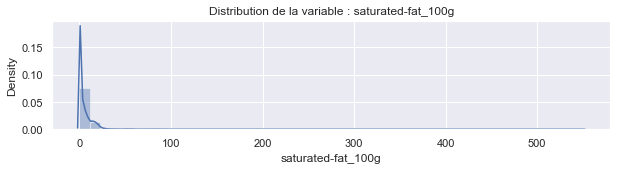

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


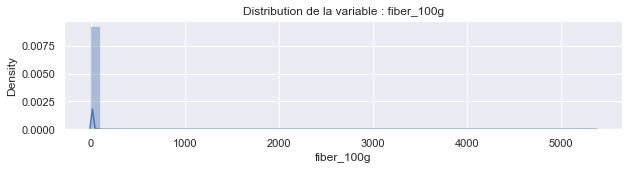

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


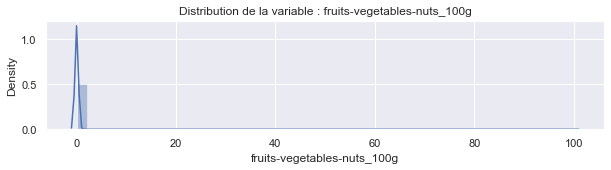

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


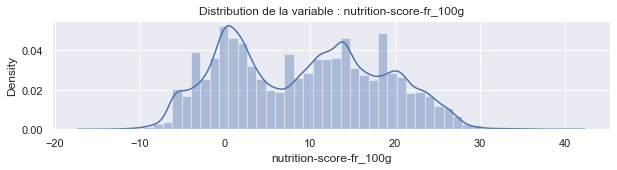

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


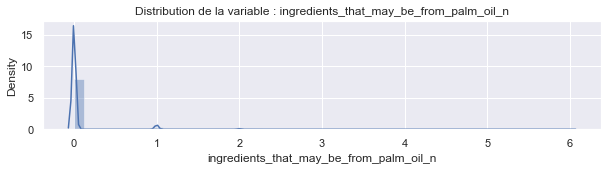

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


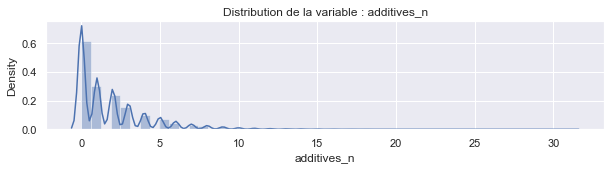

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


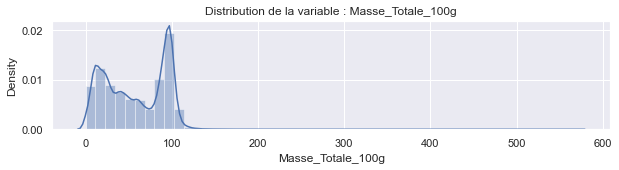

In [28]:
  # Distribution de chacune des variables avant imputation
for column in objet_sup(mod_df):

    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(mod_df[column], bins=50)
    plt.title('Distribution de la variable : ' + column)
    plt.xlabel(column)
    plt.show()
# Trop peu visible, on va supprimer les outliers extrêmes pour regarder à nouveau

A priori, aucune des variables que nous étudions ne suit une loi normale. Nous le vérifirons plus tard par des tests statistiques.

In [29]:
#Suppression des outliers pour chaque variable sauf le nutriscore, remplacés par des NaN, par méthode du centile extrême puis
#par tri des valeurs négatives, on automatise par une fonction

def delete_outliers_extreme_neg(dataframe):
    
    for column in objet_sup(dataframe).columns.tolist() :
        dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)] = np.nan
        dataframe.loc[dataframe[column] < 0] = np.nan
    return dataframe

mod_df2 = delete_outliers_extreme_neg(mod_df[mod_df.columns.difference(['nutrition-score-fr_100g'])])
mod_df2.shape

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


(320639, 17)

In [30]:
#On ré-intégre le nutriscore après avoir supprimé les valeurs négatives / centile extrême
mod_df2 = mod_df2.join(mod_df['nutrition-score-fr_100g'])

In [31]:
mod_df2['nutrition-score-fr_100g'].value_counts(ascending=False)

 0.0     12759
 1.0     11263
 14.0    11247
 2.0     10602
 13.0     8826
-1.0      8801
 12.0     8652
 11.0     8649
 3.0      7856
 15.0     7528
 10.0     6964
 20.0     6901
 16.0     6685
 21.0     6414
 9.0      6373
 4.0      6161
-2.0      6160
 19.0     6121
 17.0     6060
 18.0     5744
 8.0      5169
-3.0      5107
-6.0      4924
 5.0      4847
 6.0      4653
 23.0     4547
 22.0     4454
-4.0      4410
 24.0     4139
 7.0      4135
-5.0      4106
 25.0     2879
 26.0     2623
 27.0     1694
-7.0       950
 28.0      680
-8.0       601
-9.0       315
 29.0      279
 30.0      207
-10.0      159
 33.0      105
-11.0       90
 31.0       79
 32.0       73
-12.0       46
 35.0       36
-13.0       23
 34.0       20
 36.0       17
-14.0        5
 40.0        4
 37.0        3
 38.0        1
-15.0        1
Name: nutrition-score-fr_100g, dtype: int64

In [32]:
#Suppression des lignes ne contenant que des NaN
mod_df2 = mod_df2.dropna(how='all')
mod_df2.shape

(317325, 18)

In [33]:
#Suppression des Masse_Totale_100 plus grandes que 100
mod_df2 = mod_df2.loc[mod_df2['Masse_Totale_100g']<=100]
mod_df2.shape

(162588, 18)

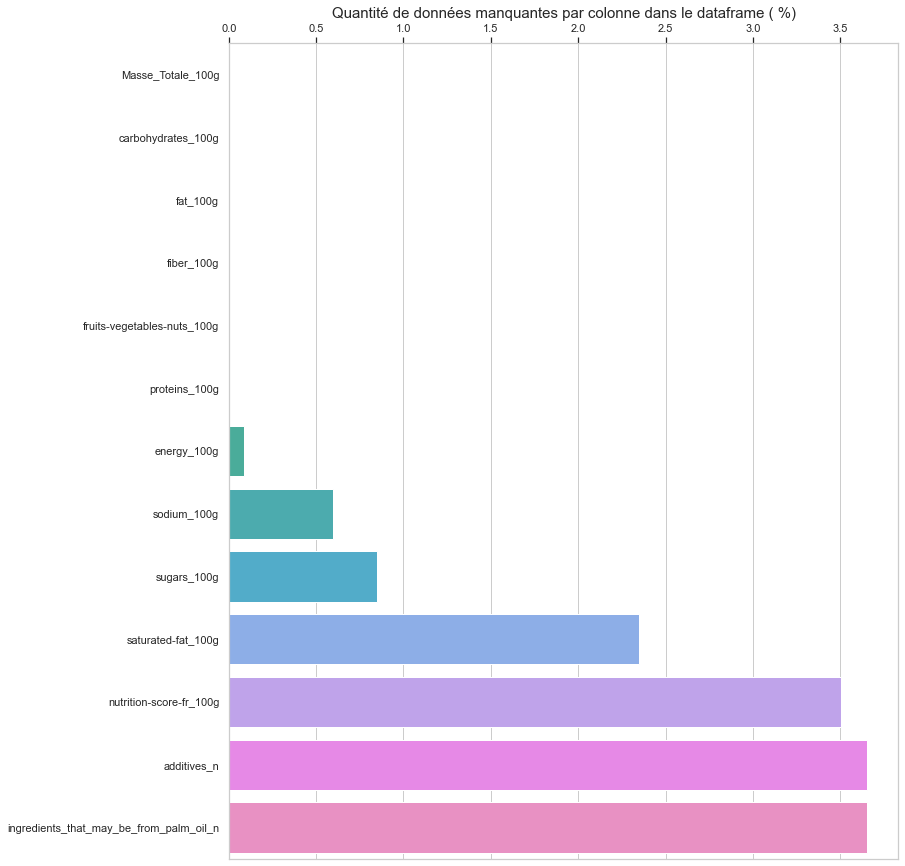

In [34]:
#Meilleure vue sur les données manquantes (qualitative)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 15))
ax = sns.barplot(y = proportion_missing_values(objet_sup(mod_df2)).index,
                 x=proportion_missing_values(objet_sup(mod_df2)).values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le dataframe ( %)', size=15)
plt.show()

## Imputation des valeurs manquantes via k-NN imputer

In [35]:
#Normalisation de nos données
scaler = StandardScaler()
scaled_mod_df2 = pd.DataFrame(scaler.fit_transform(objet_sup(mod_df2)), columns = objet_sup(mod_df2).columns)
scaled_mod_df2.head()

,Masse_Totale_100g,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,fruits-vegetables-nuts_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
0,1.423718,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.037787,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396
1,1.207872,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.037787,-0.206947,0.207781,NaN,NaN,NaN,NaN
2,1.393403,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.037787,-0.206947,2.203016,NaN,NaN,NaN,NaN
3,1.160277,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.037787,-0.206947,0.968334,NaN,NaN,NaN,NaN
4,1.325193,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.037787,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396


In [36]:
#Imputation par K-NN
# On impute le nutriscore pour les produits pour lesquels il n'est pas renseigné, pour répondre à l'une des tâches de notre
# application.
imputer = KNNImputer(n_neighbors=5)
mod_df3 = pd.DataFrame(imputer.fit_transform(scaled_mod_df2),columns = scaled_mod_df2.columns)

In [37]:
mod_df3.describe()

,Masse_Totale_100g,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,fruits-vegetables-nuts_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
count,1.625880e+05,162588.000000,1.625880e+05,162588.000000,1.625880e+05,1.625880e+05,1.625880e+05,162588.000000,1.625880e+05,162588.000000,162588.000000,162588.000000,162588.000000
mean,-1.398342e-16,-0.001223,-2.569950e-15,-0.000153,-9.443282e-15,-8.305606e-14,3.322098e-14,0.007815,-1.202047e-15,-0.014140,0.000271,-0.003041,-0.014599
std,1.000003e+00,0.992116,1.000003e+00,1.000024,1.000003e+00,1.000003e+00,1.000003e+00,0.998722,1.000003e+00,0.994159,1.004085,0.998334,0.997119
min,-1.606608e+00,-0.849145,-1.166877e+00,-1.525035,-8.160283e-01,-7.675949e-01,-3.778669e-02,-0.206947,-9.837975e-01,-0.698230,-0.429740,-0.765807,-2.578646
25%,-9.536904e-01,-0.849145,-9.121146e-01,-0.970076,-7.819899e-01,-7.675949e-01,-3.778669e-02,-0.206947,-7.599420e-01,-0.698230,-0.388917,-0.690782,-0.928622
50%,-9.114187e-02,-0.417751,-3.512101e-01,-0.011959,-4.238468e-01,-3.119134e-01,-3.778669e-02,-0.206947,-2.885939e-01,-0.499153,-0.185594,-0.499285,-0.048610
75%,1.088430e+00,0.445036,9.026183e-01,0.785177,5.122092e-01,3.891350e-01,-3.778669e-02,-0.206947,4.066097e-01,0.338628,0.074576,0.389992,0.721401
max,1.424931e+00,4.758975,2.401218e+00,3.538791,6.090067e+00,7.960458e+00,4.345716e+01,8.224442,4.577831e+00,6.412124,20.416877,4.305963,3.031434


C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


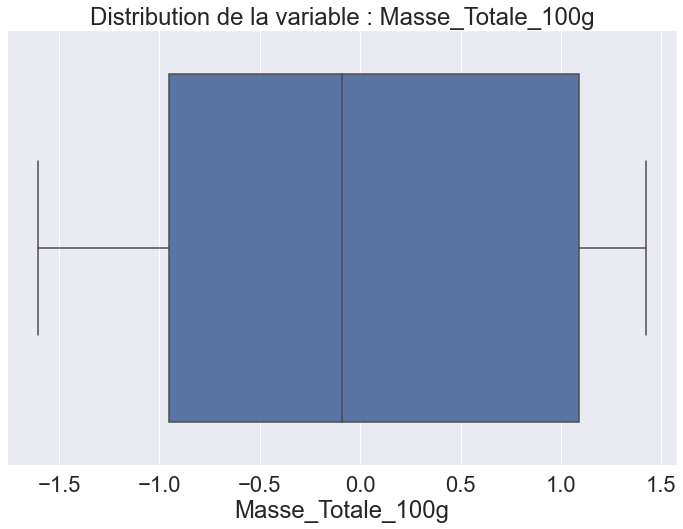

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


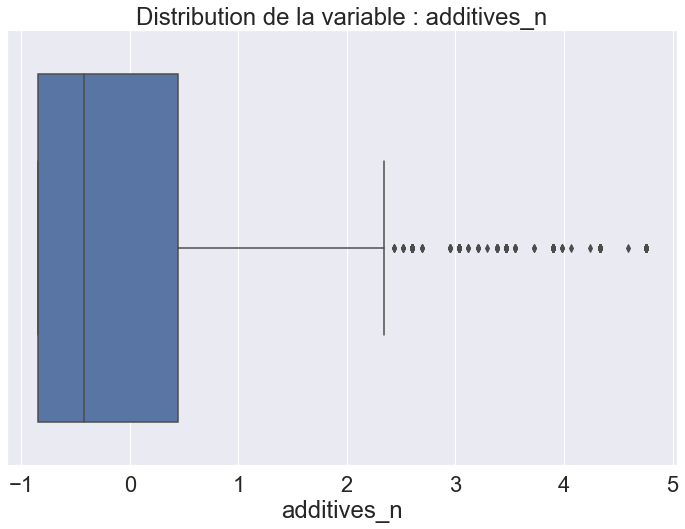

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


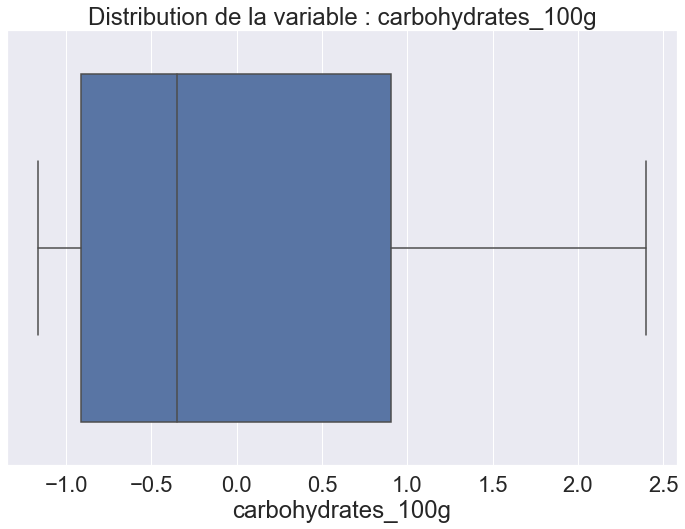

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


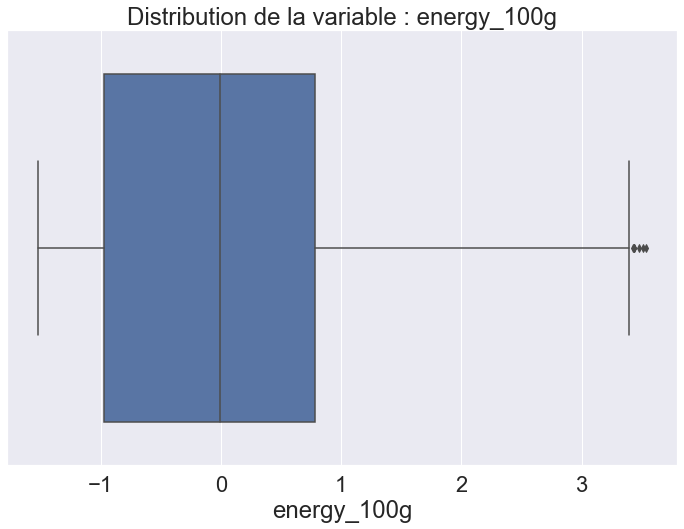

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


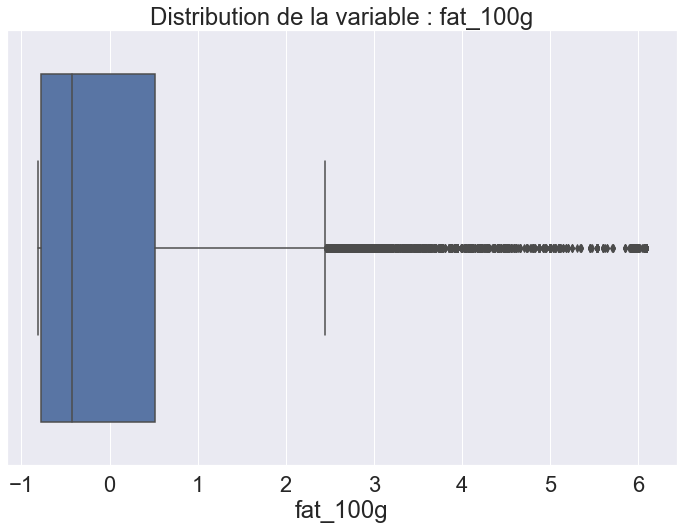

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


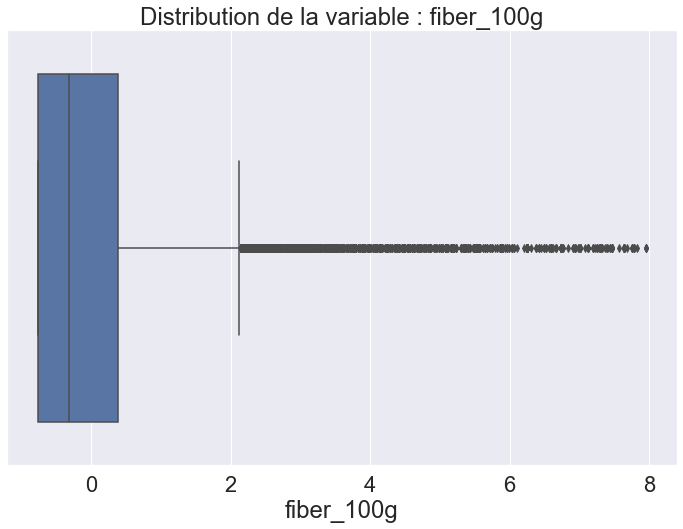

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


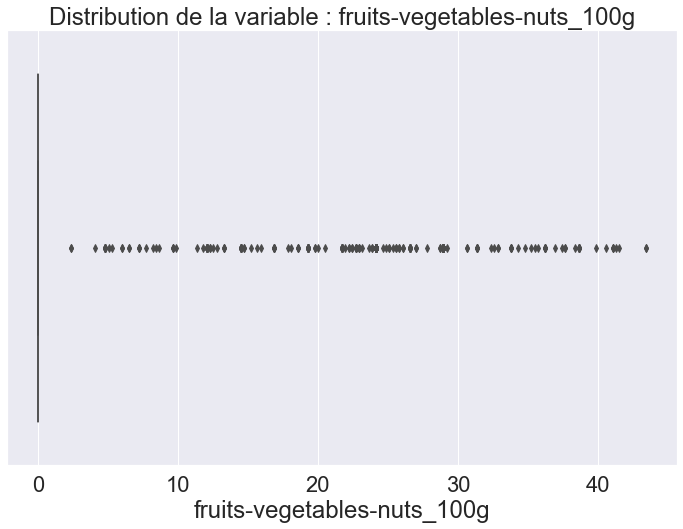

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


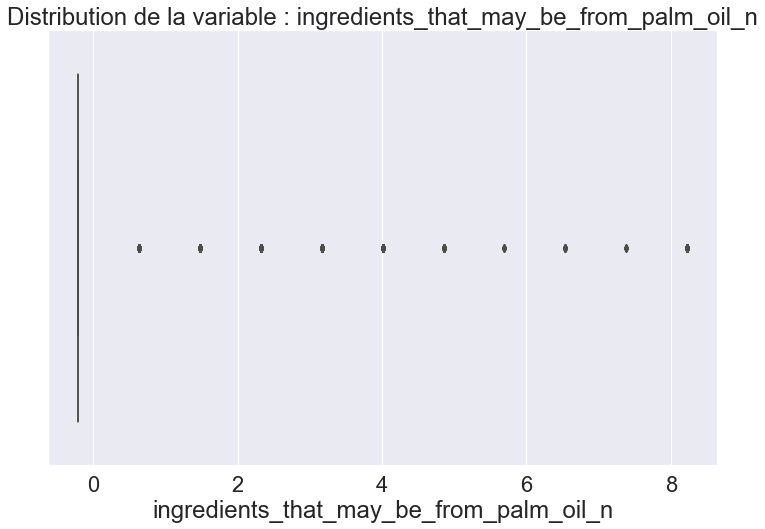

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


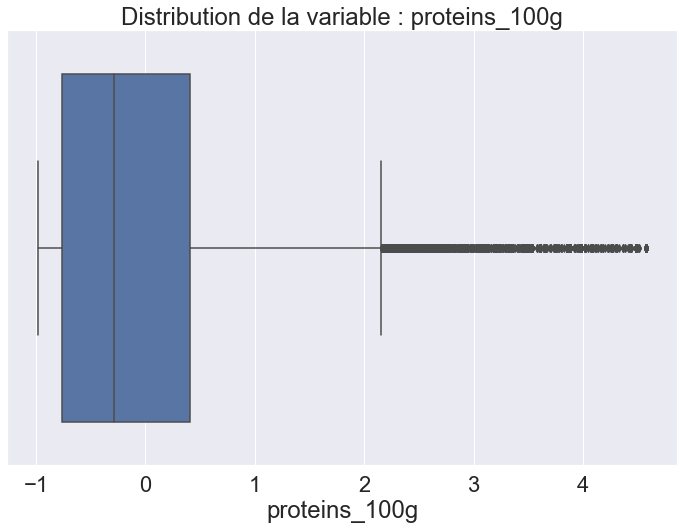

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


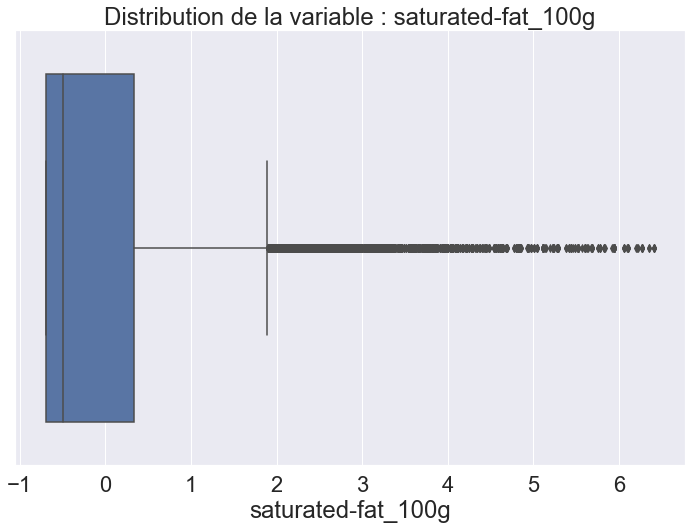

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


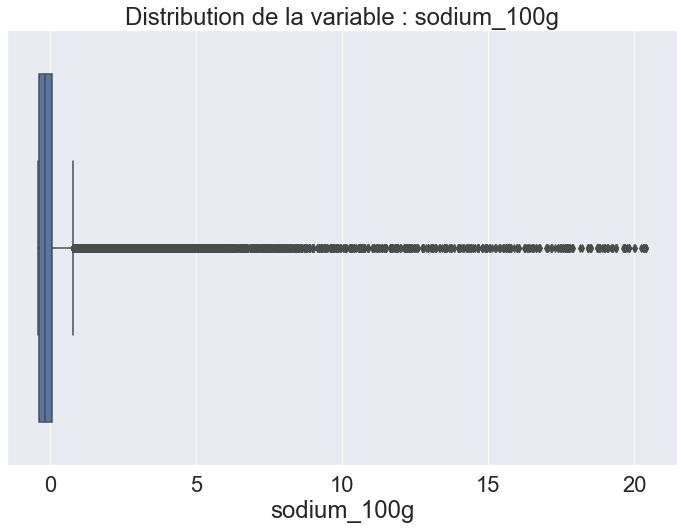

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


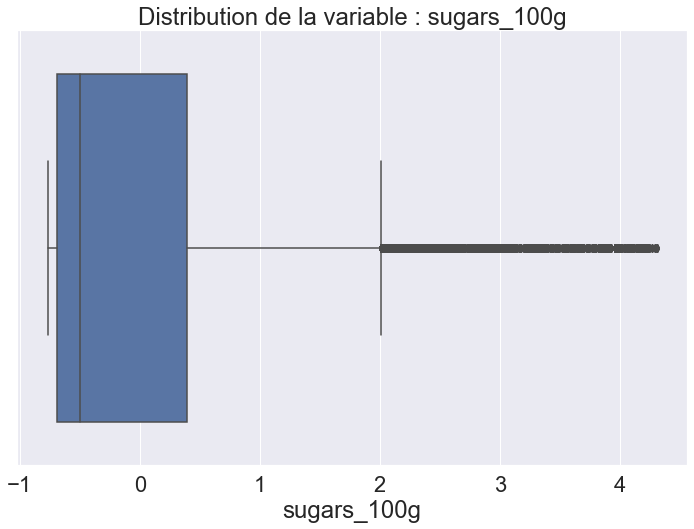

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


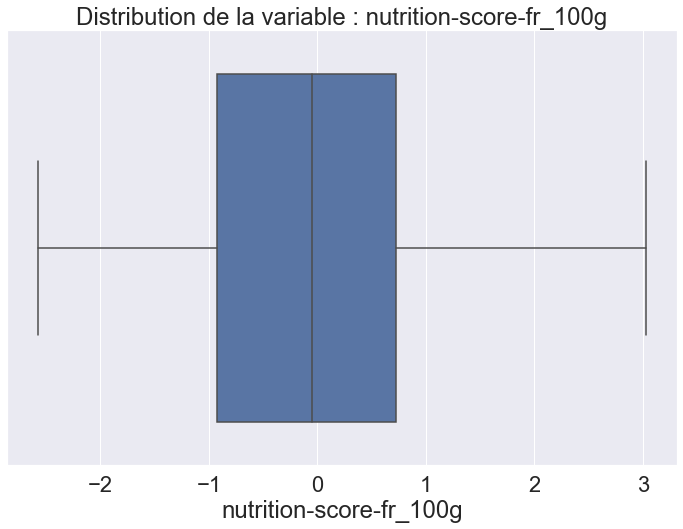

In [38]:
#Après imputation :

sns.set(font_scale=2)
for column in objet_sup(mod_df3):
    plt.figure(figsize = (12,8))
    
    sns.boxplot(mod_df3[column])
    
    plt.title('Distribution de la variable : ' + column)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


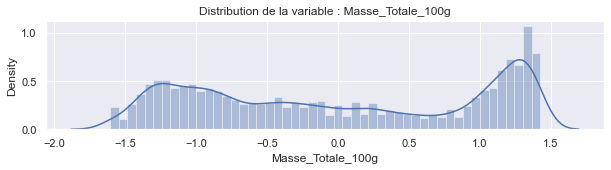

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


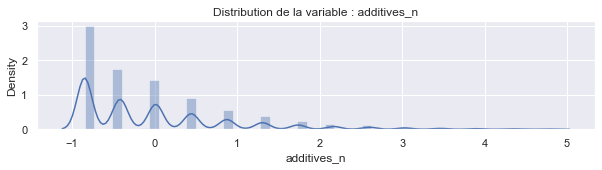

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


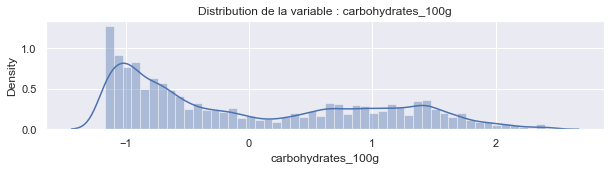

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


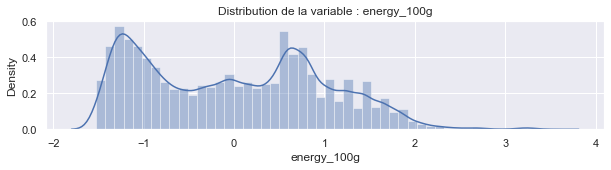

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


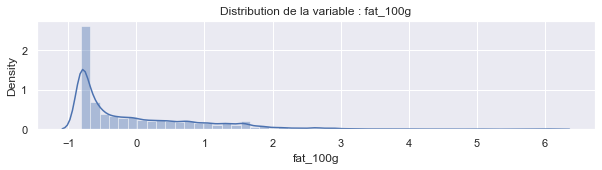

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


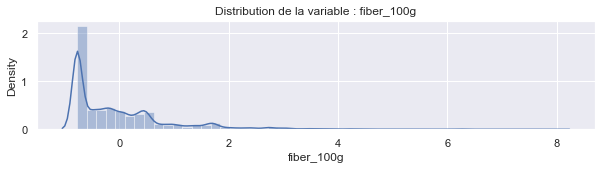

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


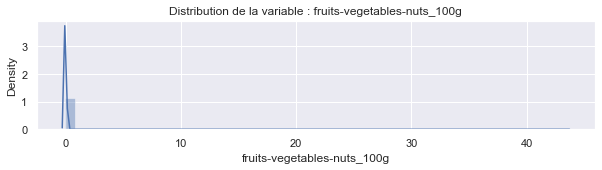

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


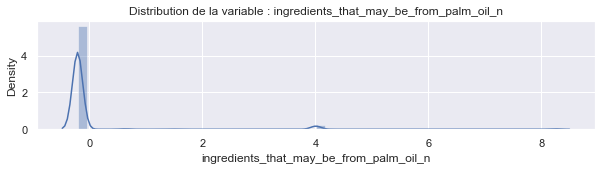

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


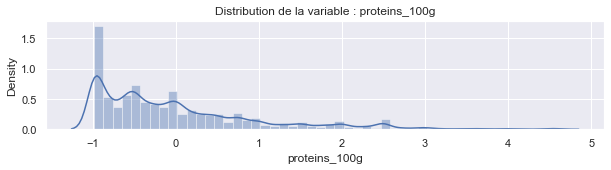

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


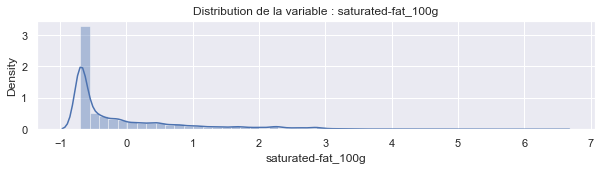

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


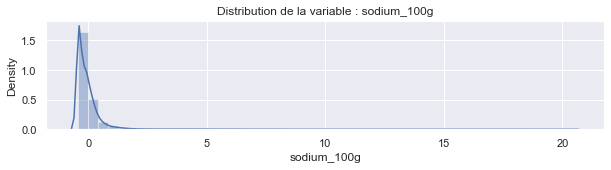

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


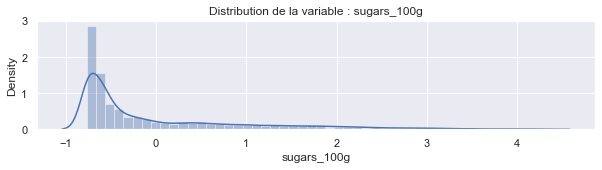

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


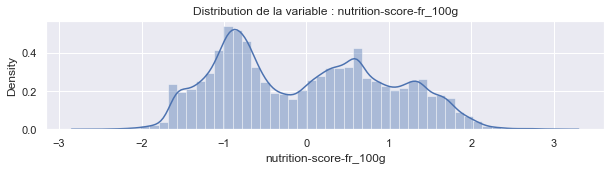

In [39]:
  # Distribution de chacune des variables après imputation
for column in objet_sup(mod_df3):

    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(mod_df3[column], bins=50)
    plt.title('Distribution de la variable : ' + column)
    plt.xlabel(column)
    plt.show()

In [40]:
mod_df3.shape

(162588, 13)

In [41]:
mod_df3.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162588 entries, 0 to 162587
Data columns (total 13 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Masse_Totale_100g                        162588 non-null  float64
 1   additives_n                              162588 non-null  float64
 2   carbohydrates_100g                       162588 non-null  float64
 3   energy_100g                              162588 non-null  float64
 4   fat_100g                                 162588 non-null  float64
 5   fiber_100g                               162588 non-null  float64
 6   fruits-vegetables-nuts_100g              162588 non-null  float64
 7   ingredients_that_may_be_from_palm_oil_n  162588 non-null  float64
 8   proteins_100g                            162588 non-null  float64
 9   saturated-fat_100g                       162588 non-null  float64
 10  sodium_100g                     

C:\Users\alexa\AppData\Local\Temp/ipykernel_3104/2583387027.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  mod_df3.info(verbose = True, null_counts = True)


In [42]:
# Fonction pour ne garder que les variables objets d'un dataframe pour boucler sur les variables quantitatives
def objet_only(dataframe):
    dataframe_2 = dataframe.select_dtypes(include=["object"])
    return dataframe_2
    

In [43]:
mod_df3

,Masse_Totale_100g,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,fruits-vegetables-nuts_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
0,1.423718,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.037787,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396
1,1.207872,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.037787,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632
2,1.393403,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.037787,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631
3,1.160277,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.037787,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627
4,1.325193,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.037787,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162583,1.210904,-0.849145,1.939507,0.560651,-0.816028,0.879869,-0.037787,-0.206947,-0.819729,-0.698230,-0.418428,-0.642514,-1.038624
162584,1.318827,-0.762867,1.502058,0.795062,-0.608838,1.300498,-0.037787,-0.206947,0.823732,-0.598692,-0.177378,-0.629398,-1.368629
162585,-0.199974,-0.849145,-0.731569,-0.721544,1.477864,-0.382018,-0.037787,-0.206947,-0.691812,1.028096,-0.021507,-0.262145,-0.158611
162586,-1.564166,-0.849145,-1.149036,-1.495381,-0.801229,-0.697490,-0.037787,-0.206947,-0.914277,-0.665051,-0.420313,-0.739574,-0.708619


In [44]:
objet_only(mod_df2).reset_index()

,index,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2
0,3,16087,états-unis,unknown,unknown,unknown
1,4,16094,états-unis,unknown,unknown,unknown
2,10,16612,états-unis,unknown,unknown,unknown
3,11,16650,états-unis,unknown,unknown,unknown
4,12,16872,états-unis,unknown,unknown,unknown
...,...,...,...,...,...,...
162583,320742,9787461062105,états-unis,unknown,unknown,unknown
162584,320751,9847548283004,france,france,cereals and potatoes,bread
162585,320756,989898,suisse,unknown,unknown,unknown
162586,320763,99111250,france,unknown,beverages,non-sugared beverages


In [45]:
# On effectue une jointure de nos dataframes pour récupèrer un objet facilement exportable
mod_df4 = objet_only(mod_df2).reset_index().join(mod_df3)

In [46]:
objet_only(mod_df2).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162588 entries, 3 to 320768
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   code                       162588 non-null  object
 1   countries_fr               162568 non-null  object
 2   manufacturing_places_tags  162588 non-null  object
 3   pnns_groups_1              162588 non-null  object
 4   pnns_groups_2              162588 non-null  object
dtypes: object(5)
memory usage: 7.4+ MB


In [47]:
mod_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162588 entries, 0 to 162587
Data columns (total 13 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Masse_Totale_100g                        162588 non-null  float64
 1   additives_n                              162588 non-null  float64
 2   carbohydrates_100g                       162588 non-null  float64
 3   energy_100g                              162588 non-null  float64
 4   fat_100g                                 162588 non-null  float64
 5   fiber_100g                               162588 non-null  float64
 6   fruits-vegetables-nuts_100g              162588 non-null  float64
 7   ingredients_that_may_be_from_palm_oil_n  162588 non-null  float64
 8   proteins_100g                            162588 non-null  float64
 9   saturated-fat_100g                       162588 non-null  float64
 10  sodium_100g                     

In [48]:
mod_df4.shape

(162588, 19)

In [49]:
mod_df4.head()

,index,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,Masse_Totale_100g,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,fruits-vegetables-nuts_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
0,3,16087,états-unis,unknown,unknown,unknown,1.423718,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.037787,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396
1,4,16094,états-unis,unknown,unknown,unknown,1.207872,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.037787,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632
2,10,16612,états-unis,unknown,unknown,unknown,1.393403,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.037787,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631
3,11,16650,états-unis,unknown,unknown,unknown,1.160277,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.037787,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627
4,12,16872,états-unis,unknown,unknown,unknown,1.325193,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.037787,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396


In [50]:
mod_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162588 entries, 0 to 162587
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   index                                    162588 non-null  int64  
 1   code                                     162588 non-null  object 
 2   countries_fr                             162568 non-null  object 
 3   manufacturing_places_tags                162588 non-null  object 
 4   pnns_groups_1                            162588 non-null  object 
 5   pnns_groups_2                            162588 non-null  object 
 6   Masse_Totale_100g                        162588 non-null  float64
 7   additives_n                              162588 non-null  float64
 8   carbohydrates_100g                       162588 non-null  float64
 9   energy_100g                              162588 non-null  float64
 10  fat_100g                        

In [51]:
#Suppression de la colonne MasseTotale100g qui ne servait qu'au nettoyage ainsi que de la variable fruits-vegetables-nuts.
mod_df4 = mod_df4.drop(['Masse_Totale_100g', 'fruits-vegetables-nuts_100g'], axis = 1)

In [52]:
mod_df4.head()

,index,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
0,3,16087,états-unis,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396
1,4,16094,états-unis,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632
2,10,16612,états-unis,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631
3,11,16650,états-unis,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627
4,12,16872,états-unis,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396


In [53]:
#Export de notre jeu de données nettoyé en fichier csv à appeler pour les analyses exploratoires
mod_df4.to_csv ('projet3_propre.csv', index = False, header=True)


## Nous avons désormais un jeu complet et analysable !